## Actividad 2

### Solución cerrada de regresión lineal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression

In [2]:
class regressionLineal():

    def __init__(self, tipoDeDatos, N):
        self.tipoDeDatos = tipoDeDatos
        self.tamano = N

    def visualizar(self, y, x, num):

        plt.figure(figsize=[8,6])
        plt.title("Scatter Plot")
        plt.xlabel("Variable Independiente X")
        plt.ylabel("Variable Dependiente Y")
        plt.scatter(x[:num], y[:num], c='#008080', alpha=0.5)

        option = int(input("(1) Para visualizar | (2) Para Guardar: "))
        if option == 1:
            plt.show()
        elif option == 2:
            plt.savefig("imagen1.jpg")

    def optimizar(self, y, x):
        X = np.array([[i, 1] for i in x])
        theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        return theta
    
    def resultado(self, x, y, m, b, num):
        plt.figure()
        plt.scatter(x[:num], y[:num], marker = '.',c='#008080', alpha=0.5)
        x2 = np.linspace(0, max(x), 1000)
        y2 = m*x2 + b
        plt.plot(x2, y2, c='#ff0000')
        plt.show()

In [3]:
tipoDeDatos = input("Tipo de datos (simulado | real): ")
N = 1000
r = regressionLineal(tipoDeDatos, N)

In [4]:
# variable independiente x
x = np.random.uniform(0.0, 3.0, N)

# variable dependiente y
error = np.random.uniform(2.0, 4.0, N)
y = 5 + 2*x + error

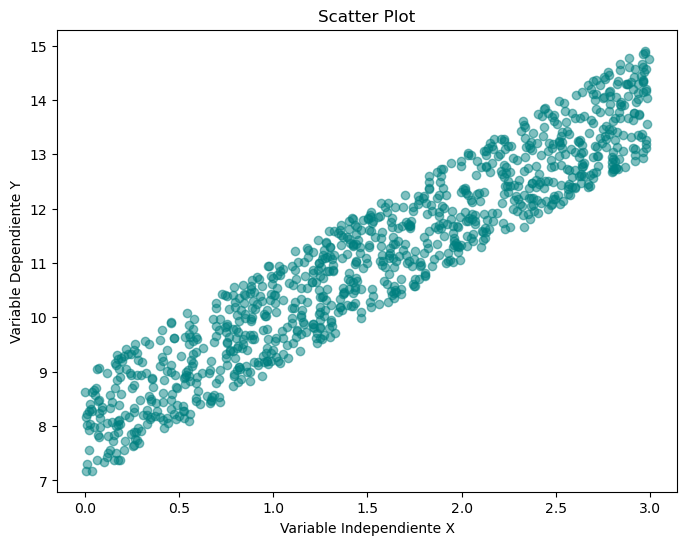

In [5]:
num = int(input(f"Numero de datos a visualizar (1 a {N}): "))
r.visualizar(y, x, num)

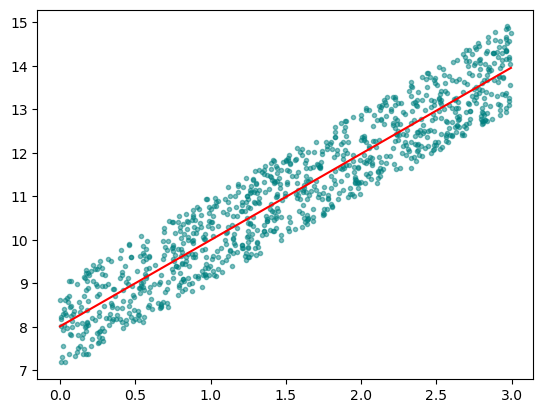

In [6]:
m, b = r.optimizar(y, x)
r.resultado(x, y, m, b, num)

In [7]:
print(m, b)

1.9849486584706817 8.008180560594779


### Regresión polinomial

In [8]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [9]:
csv = pd.read_csv("measurements.csv")
csv

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [10]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [11]:
print(csv['AC'].sum(), csv['rain'].sum(), csv['sun'].sum())

30 48 32


In [12]:
def fixfloats(value):
    value = value.replace(',','.')
    return float(value)

In [13]:
csv['distance'] = csv['distance'].apply(fixfloats)
csv['consume'] = csv['consume'].apply(fixfloats)
csv = csv.astype({'gas_type':'str'})

csv['specials'] = csv['specials'].fillna('None')

csv = csv.dropna(subset=['temp_inside'])
csv['temp_inside'] = csv['temp_inside'].apply(fixfloats)

csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       376 non-null    float64
 1   consume        376 non-null    float64
 2   speed          376 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   376 non-null    int64  
 5   specials       376 non-null    object 
 6   gas_type       376 non-null    object 
 7   AC             376 non-null    int64  
 8   rain           376 non-null    int64  
 9   sun            376 non-null    int64  
 10  refill liters  13 non-null     object 
 11  refill gas     13 non-null     object 
dtypes: float64(3), int64(5), object(4)
memory usage: 38.2+ KB


In [14]:
csv.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,None,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,None,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,None,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,None,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,None,E10,0,0,0,NaN,NaN


In [15]:
r2 = regressionLineal("real", len(csv))

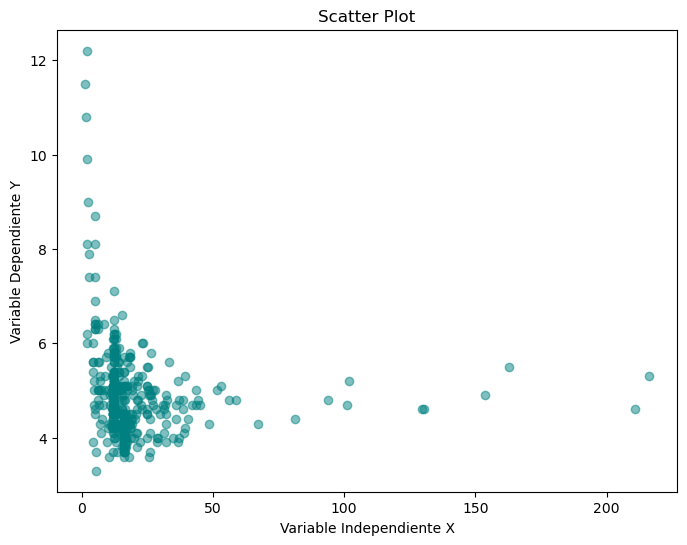

In [16]:
r2.visualizar(csv['consume'], csv['distance'], len(csv))

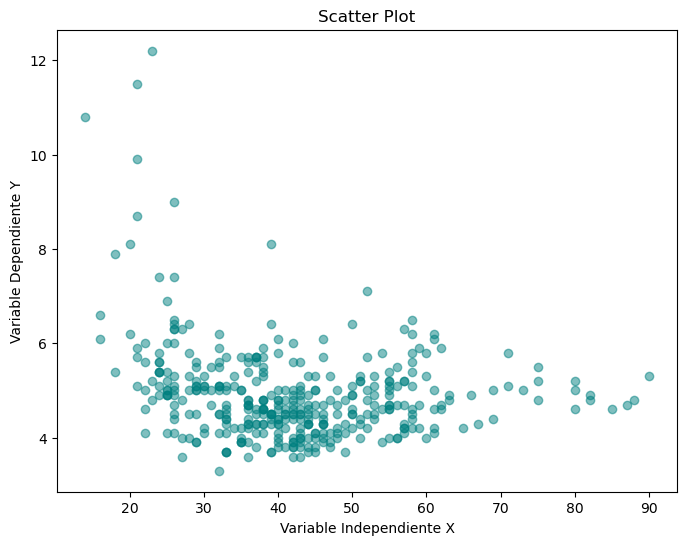

In [17]:
r2.visualizar(csv['consume'], csv['speed'], len(csv))

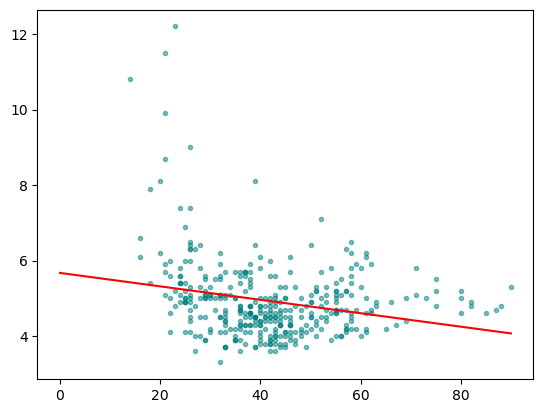

In [18]:
m2, b2 = r2.optimizar(csv['consume'], csv['speed'])
r2.resultado(csv['speed'], csv['consume'], m2, b2, len(csv))

In [19]:
print(m2, b2)

-0.017797706888625253 5.672012297539764


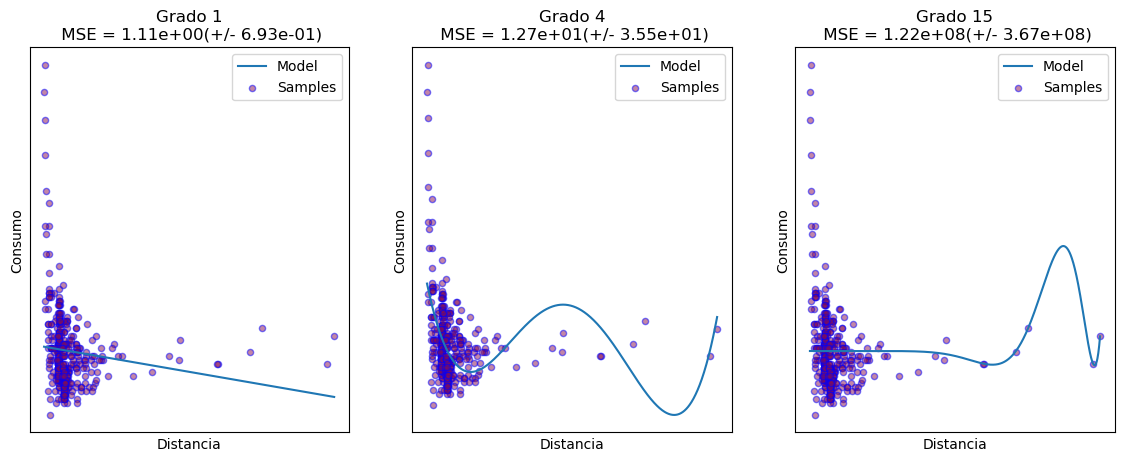

In [20]:
n_samples = 30
degrees = [1, 4, 15]


plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    xNew = np.array(csv['distance']).reshape((-1,1))
    pipeline.fit(xNew, csv['consume'])

    scores = cross_val_score(
        pipeline, xNew, csv['consume'], scoring="neg_mean_squared_error", cv=10
    )


    plt.plot((np.linspace(min(xNew),max(xNew),1000)), pipeline.predict(np.linspace(min(xNew),max(xNew),1000)), label="Model")
    plt.scatter(csv['distance'], csv['consume'], edgecolor="b", s=20, label="Samples",  c='#880e4f', alpha=0.5)
    plt.xlabel("Distancia")
    plt.ylabel("Consumo")

    plt.legend(loc="best")
    plt.title(
        "Grado {}\n MSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

<i> - Notamos que el error cuadrático medio no se ajusta a como esperábamos. Entonces nos dimos cuenta que el modelo aprende bien la data de entrenamiento, pero de memoria sin considerar factores externos y eso hace que al momento de testear falle y no generalice bien. Debido a que no logra entender las diferencias entre lo que no es ruido o datos atípicos, ya sea datos que no son útiles.

### Regresión con penalización

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [22]:
X = csv[['distance']] 
y = csv['consume']

poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

d:\VSCode\UC\Curso 3 Aplicaciones IA\entornoConda\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.41214e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
d:\VSCode\UC\Curso 3 Aplicaciones IA\entornoConda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.343e+02, tolerance: 3.304e-02
  model = cd_fast.enet_coordinate_descent(
d:\VSCode\UC\Curso 3 Aplicaciones IA\entornoConda\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08243e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
d:\VSCode\UC\Curso 3 Aplicaciones IA\entornoConda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py

[[0.01, 0.5138491457486308, 0.7614932860697402], [0.02, 0.5138524174658016, 0.7622148268896808], [0.03, 0.5138556893725127, 0.7629431354498627], [0.04, 0.5138589614652808, 0.7636782117502884], [0.05, 0.5138622337277793, 0.7644200557909536], [0.06, 0.5138655060838163, 0.7651686675718609], [0.07, 0.5138687786373102, 0.7659240470930152], [0.08, 0.5138720514247052, 0.7666861943544064], [0.09, 0.5138753242850204, 0.7674551093560469], [0.1, 0.5138785973498097, 0.7682307912233969], [0.11, 0.5138818705795001, 0.7690132416149951], [0.12, 0.5138851440573674, 0.7698024597462676], [0.13, 0.5138884175249437, 0.7705984456172349], [0.14, 0.5138916912782492, 0.771401199227875], [0.15, 0.513894965206562, 0.7722107205782125], [0.16, 0.5138982392356901, 0.773027009668235], [0.17, 0.5139015134613569, 0.773850066497927], [0.18, 0.5139047878508031, 0.7746798910673204], [0.19, 0.5139080623473219, 0.7755164833764008], [0.2, 0.5139113371224312, 0.7763598434251665], [0.21, 0.5139146120269651, 0.7772099712136202

d:\VSCode\UC\Curso 3 Aplicaciones IA\entornoConda\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.97917e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
d:\VSCode\UC\Curso 3 Aplicaciones IA\entornoConda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.564e+02, tolerance: 3.304e-02
  model = cd_fast.enet_coordinate_descent(
d:\VSCode\UC\Curso 3 Aplicaciones IA\entornoConda\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.03329e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
d:\VSCode\UC\Curso 3 Aplicaciones IA\entornoConda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py

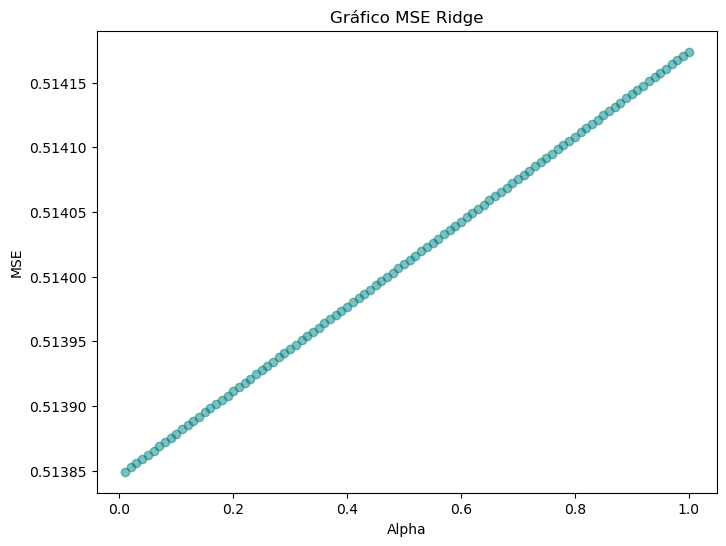

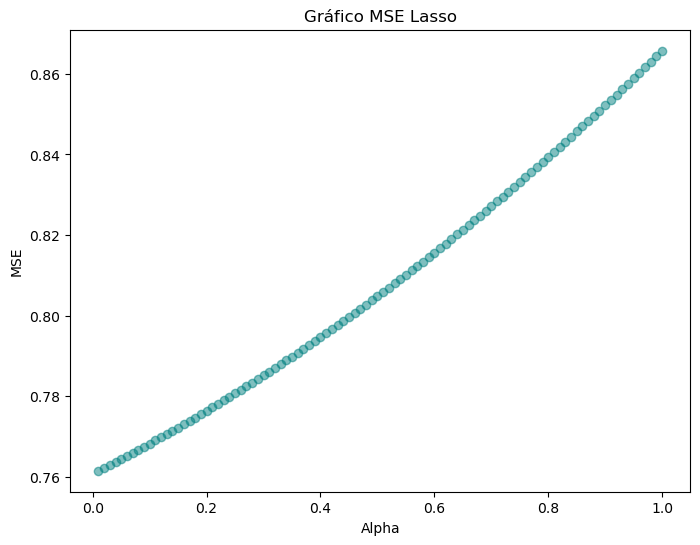

In [27]:
MSE=[]

for x in range(1,101,1):
    x = x/100
    # Crear y ajustar el modelo Ridge
    ridge = Ridge(alpha=x)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)

    # Crear y ajustar el modelo Lasso
    lasso = Lasso(alpha=x)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)

    # Evaluar el desempeño de ambos modelos
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)

    MSE.append([float(x),float(mse_ridge),float(mse_lasso)])
# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(MSE, columns=['Alpha', 'MSE_Ridge', 'MSE_Lasso'])

print(MSE)

plt.figure(figsize=[8,6])
plt.title("Gráfico MSE Ridge")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.scatter(np.array(results_df['Alpha']), np.array(results_df['MSE_Ridge']), c= '#008080', alpha= 0.5)
plt.show()


plt.figure(figsize=[8,6])
plt.title("Gráfico MSE Lasso")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.scatter(np.array(results_df['Alpha']), np.array(results_df['MSE_Lasso']), c= '#008080', alpha= 0.5)
plt.show()

<i> - En el modelo de Ridge se observa que a medida de que aumenta el Aplha, disminuye el error, mientras que en el modelo de Lasso para este caso aumenta el MSE, a medida que aumenta el Alpha.

<i>  - El modelo adecuado de penalizacion es el de Ridge, se observa que para cualquier valor de Aplha para este conjunto de datos es menor al MSE entregado por el modelo de Lasso